# Linear Regression

### Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
%matplotlib inline
import os
from tabulate import tabulate

### Import Dataset

In [2]:
from sklearn.datasets import fetch_openml 
boston = fetch_openml(name='boston', version=1) 
boston 

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [3]:
boston.data.shape

(506, 13)

In [4]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [5]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [6]:
data.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [7]:
data['Price'] = boston.target
data.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  Price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2

In [8]:
data.describe()

CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT       Price  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063   22.532806  
std      2.105710  168.537116    2.164946   91.294864    7.141062    9.197104  
min      1.129600  187.000000   12.600000    0.320000    1.730000    5.000000  
25%      2.100175  279.000000   17.400000  375.377500    6.950000   17.025000  
50%      3.207450  330.000000   19.050000  391.440000   11.360000   21.200000  
75%      5.188425  666.000000   20.200000  396.225000   16.955000   25.000000  
max     12.126500  711.000000   22.000000  396.900000   37.970000   50.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [10]:
X = data.drop(columns=['Price'])
y = data['Price']

In [11]:
X.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [12]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

### Normalize the Data

In [13]:
# Normalize the Data 
X = X.apply(pd.to_numeric)
y = pd.to_numeric(y)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

### Implement Linear Regression

In [14]:
class LinearReg:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost = []  # Initialize an empty list for storing costs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            cost = (1 / (2 * n_samples)) * np.sum((y_predicted - y) ** 2)
            self.cost.append(cost)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def r2_score(self, X, y):
        y_predicted = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_predicted) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2


In [15]:
regressor = LinearReg(learning_rate = 0.01, n_iterations = 1000)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
regressor.fit(X_train,y_train)

In [17]:
prediction = regressor.predict(X_test)

### Calculate Mean Squared Error and R-Squared Error

In [18]:
mean_squared = np.mean((prediction - y_test)** 2)
print(f"Mean Squared Error: {mean_squared}")
r_squared = regressor.r2_score(X_test, y_test)
print(f"R-squared: {r_squared}")

Mean Squared Error: 25.4063116943446
R-squared: 0.6535524201880993


### Calculate the Cost Function 

In [19]:
print("Cost function values for Custom Linear Regression:")
print(regressor.cost[-1])

Cost function values for Custom Linear Regression:
10.940104982398202


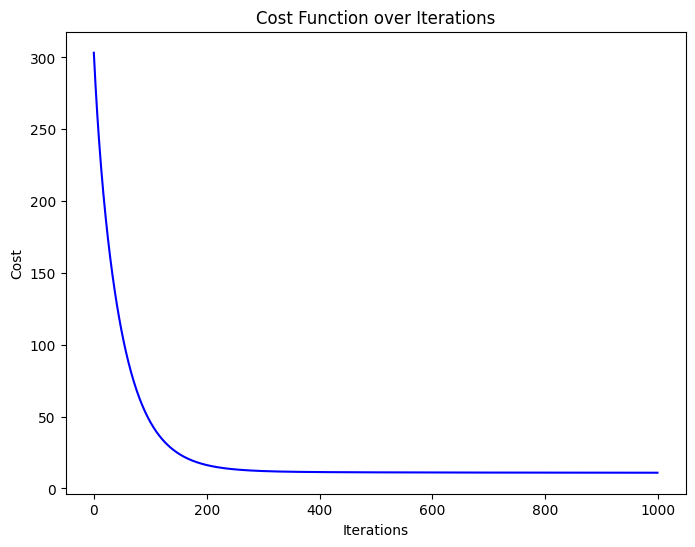

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(regressor.cost)), regressor.cost, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

### Plot the Results 

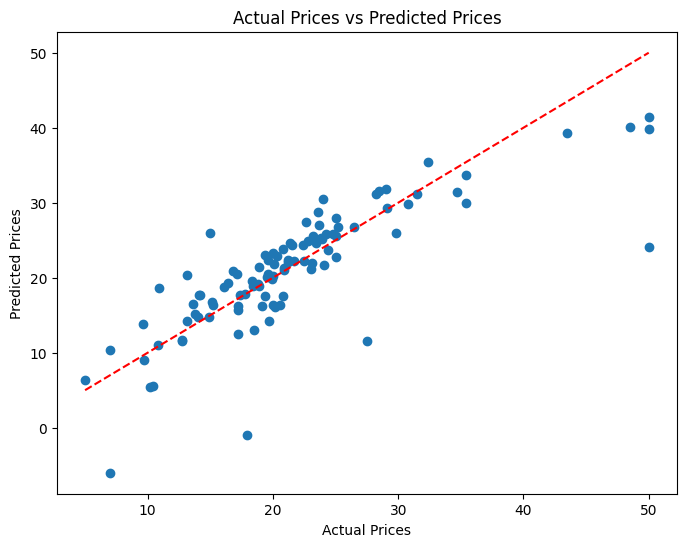

In [21]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Line of best fit
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

### Perform Linear Regression with skLearn 

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 24.29
R-squared: 0.67


In [27]:
print("Coefficients:")
for feature, coef in zip(boston.feature_names, model.coef_):
    print(f"{feature}: {coef:.2f}")

Coefficients:
CRIM: -0.97
ZN: 0.70
INDUS: 0.28
CHAS: 0.71
NOX: -1.99
RM: 3.12
AGE: -0.18
DIS: -3.05
RAD: 2.28
TAX: -1.79
PTRATIO: -1.98
B: 1.13
LSTAT: -3.63


### Compare the Results

In [28]:
table = [["Custom Linear Regression",mean_squared,r_squared],["Sklearn Linear Regression",mse,r2]]

In [29]:
headers = ["Model","Mean Squared Error","R-Squared Error"]
print(tabulate(table, headers, tablefmt="grid"))

+---------------------------+----------------------+-------------------+
| Model                     |   Mean Squared Error |   R-Squared Error |
+===========================+======================+===================+
| Custom Linear Regression  |              25.4063 |          0.653552 |
+---------------------------+----------------------+-------------------+
| Sklearn Linear Regression |              24.2911 |          0.668759 |
+---------------------------+----------------------+-------------------+
